In [93]:
from pathlib import Path
import os
import copy
import matplotlib.pyplot as plt
from hyperct import Complex
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._curvatures import b_curvatures_hn_ij_c_ij
from data.data_levelset_geometric_shapes.extract_and_process_interface_points import read_data


def HC_curvatures_sessile(HC, bV, r, theta_p, printout=False):
    R = r / np.cos(theta_p)
    K_f = (1 / R) ** 2
    H_f = 2 / R  # 2 / R
    HNdA_ij = []
    HNdA_i = []
    HN_i = []
    C_ij = []
    K_H_i = []
    HNdA_i_Cij = []
    Theta_i = []

    N_i = []  # Temp cap rise normal

    HNdA_i_cache = {}
    HN_i_cache = {}
    C_ij_cache = {}
    K_H_i_cache = {}
    HNdA_i_Cij_cache = {}
    Theta_i_cache = {}

    for v in HC.V:
        #TODO: REMOVE UNDER NORMAL CONDITIONS:
        if 0:
            if v in bV:
                continue
        N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
        N_f0 = normalized(N_f0)[0]
        N_i.append(N_f0)
        F, nn = vectorise_vnn(v)
        # Compute discrete curvatures
        c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
        # Append lists
        HNdA_ij.append(c_outd['HNdA_ij'])
        HNdA_i.append(c_outd['HNdA_i'])
        #HNdA_ij_dot.append(np.sum(np.dot(c_outd['HNdA_ij'], c_outd['n_i'])))
        HN_i.append(c_outd['HN_i'])
        C_ij.append(c_outd['C_ij'])
        K_H_i.append(c_outd['K_H_i'])
        HNdA_i_Cij.append(c_outd['HNdA_ij_Cij'])
        Theta_i.append(c_outd['theta_i'])
        
        # CIT paper:
        if 0:
            c_outd2 = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            HN_i_2.append(c_outd2['HN_i'])
            HNdA_i_list.append(c_outd2['HNdA_i'])
            C_ij_i_list.append(c_outd2['C_ij'])

        # Append chace
        HNdA_i_cache[v.x] = c_outd['HNdA_i']
        HN_i_cache[v.x] = c_outd['HN_i']
        C_ij_cache[v.x] = c_outd['C_ij']
        K_H_i_cache[v.x] = c_outd['K_H_i']
        HNdA_i_Cij_cache[v.x] = c_outd['HNdA_ij_Cij']
        Theta_i_cache[v.x] = c_outd['theta_i']

    if printout:
        print('.')
        print(f'HNdA_ij = {HNdA_ij}')
        print(f'HN_i = {HN_i}')
        print(f'C_ij = {C_ij}')
        print(f'K_H_i = {K_H_i}')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')
        print(f'Theta_i= {Theta_i}')
        print(f'np.array(Theta_i) in deg = {np.array(Theta_i) *180/np.pi}')
        print(f'np.array(Theta_i)/np.pi= {np.array(Theta_i) / np.pi}')
        rati = 2 * np.pi /np.array(Theta_i)
        rati = 2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  (np.pi - np.array(Theta_i)/ 2 * np.pi )
        print(f' rati = { rati}')
        print(f'HNdA_i[1] * rati[1]  = {HNdA_ij[1] * rati[1] }')
        print(f'C_ij   = {C_ij }')
        print('.')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')

        print('-')
        print('Errors:')
        print('-')

        print(f'K_H_i - K_f = {np.array(K_H_i) - K_f}')
        print(f'HN_i  - H_f = {HN_i - H_f}')
        print(f'HNdA_i_Cij  - H_f = {HNdA_i_Cij - H_f}')

        #print(f'np.sum(C_ij) = {np.sum(C_ij)}')

    return (HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache)


In [94]:
filename = Path("../../ddgclib/data_levelset_geometric_shapes/sphere_coarse/extraction_data_0.000000.txt")
result_folder = Path("../../ddgclib/data_levelset_geometric_shapes/X_intersections_sphere_coarse")
plot_single_cells = False

# Create the result folder
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

In [95]:
# Read and plot the data
corners_and_intersections = read_data(filename)
#unique_intersections = extract_and_save_unique_intersection_points(corners_and_intersections, result_folder)
#plot_and_save_levelset_points(corners_and_intersections, result_folder)
#plot_unique_intersections(unique_intersections, result_folder)
#plot_intersection_points(corners_and_intersections, result_folder, plot_single_cells)

Total number of cells          :  128
Total number of intersections  :  504
Total number of levelset points:  128


In [96]:
corners_and_intersections

[{'Corners': array([[0.3125, 0.375 , 0.4375],
         [0.375 , 0.375 , 0.4375],
         [0.375 , 0.4375, 0.4375],
         [0.3125, 0.4375, 0.4375],
         [0.3125, 0.375 , 0.5   ],
         [0.375 , 0.375 , 0.5   ],
         [0.375 , 0.4375, 0.5   ],
         [0.3125, 0.4375, 0.5   ]]),
  'Intersections': array([[0.375     , 0.43577987, 0.5       ],
         [0.37388194, 0.4375    , 0.5       ],
         [0.375     , 0.4375    , 0.49514239]]),
  'Levelset': array([[0.37466445, 0.42575942, 0.47516802]])},
 {'Corners': array([[0.3125, 0.375 , 0.5   ],
         [0.375 , 0.375 , 0.5   ],
         [0.375 , 0.4375, 0.5   ],
         [0.3125, 0.4375, 0.5   ],
         [0.3125, 0.375 , 0.5625],
         [0.375 , 0.375 , 0.5625],
         [0.375 , 0.4375, 0.5625],
         [0.3125, 0.4375, 0.5625]]),
  'Intersections': array([[0.375     , 0.43577987, 0.5       ],
         [0.37388194, 0.4375    , 0.5       ],
         [0.375     , 0.4375    , 0.50485761]]),
  'Levelset': array([[0.37466445

In [97]:
cell_corners_and_intersections = corners_and_intersections
def intersection_is_found(intersection, ref_intersections):
    return any([all([np.abs(coord - coord_ref) <= 1e-14 for coord, coord_ref in zip(intersection, ref_inter)]) for ref_inter in ref_intersections])
    # Get unique intersections
all_intersections    = [inter for data in cell_corners_and_intersections for inter in data["Intersections"]]
unique_intersections = np.unique(np.array(all_intersections), axis=0)


In [98]:
def plot_intersections(axes, intersections, corners, plot_thick):
   number_of_inter = len(intersections)
   for idx in range(0, number_of_inter):
      this_inter       = intersections[idx]
      this_inter_faces = find_cell_faces(this_inter, corners)
      for nxt_idx in range(idx+1, number_of_inter):
         next_inter       = intersections[nxt_idx]
         next_inter_faces = find_cell_faces(next_inter, corners)

         if len(this_inter_faces.intersection(next_inter_faces)) > 0:
            if plot_thick:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=1.5, linewidth=0.5, color = "red")
            else:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=0.25, linewidth=0.25, color = "red")


In [99]:
corners       = cell_corners_and_intersections[0]["Corners"]
intersections = cell_corners_and_intersections[0]["Intersections"]

<IPython.core.display.Javascript object>


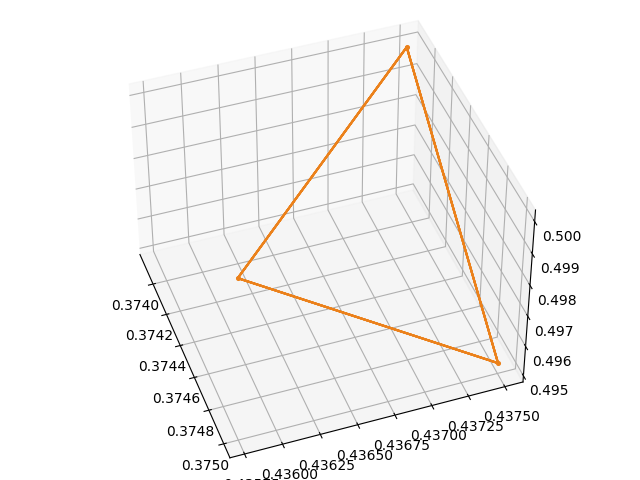

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [100]:
X = intersections
tri = scipy.spatial.Delaunay(intersections[:, 0:2])
#HC.vf_to_vv(tri.points, tri.simplices)
tri.simplices
HC = Complex(3)
points = intersections
for s in tri.simplices:
    for vi1 in s:
        v1 = HC.V[tuple(points[vi1])]
        for vi2 in s:
            v2 = HC.V[tuple(points[vi2])]
            v1.connect(v2)
HC.plot_complex()

<IPython.core.display.Javascript object>


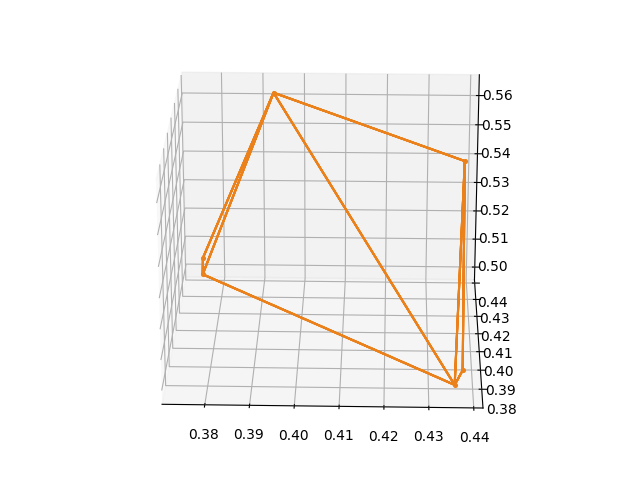

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [101]:
corners       = cell_corners_and_intersections[2]["Corners"]
intersections = cell_corners_and_intersections[16]["Intersections"]
points = intersections
tri = scipy.spatial.Delaunay(points[:, 0:2])
#HC.vf_to_vv(tri.points, tri.simplices)
tri.simplices
HC = Complex(3)
for s in tri.simplices:
    for vi1 in s:
        v1 = HC.V[tuple(points[vi1])]
        for vi2 in s:
            v2 = HC.V[tuple(points[vi2])]
            v1.connect(v2)
HC.plot_complex()

# Pseudo-triangulation algorithm


In [91]:
HC = Complex(3)
for index, c in enumerate(cell_corners_and_intersections):
    #if index % 25 == 0 or index == len(cell_corners_and_intersections) - 1:
    # Extract data
    corners       = c["Corners"]
    intersections = c["Intersections"]
    points = intersections
    tri = scipy.spatial.Delaunay(points[:, 0:2])
    #HC.vf_to_vv(tri.points, tri.simplices)
    tri.simplices

    for s in tri.simplices:
        for vi1 in s:
            v1 = HC.V[tuple(points[vi1])]
            for vi2 in s:
                v2 = HC.V[tuple(points[vi2])]
                v1.connect(v2)
    

<IPython.core.display.Javascript object>


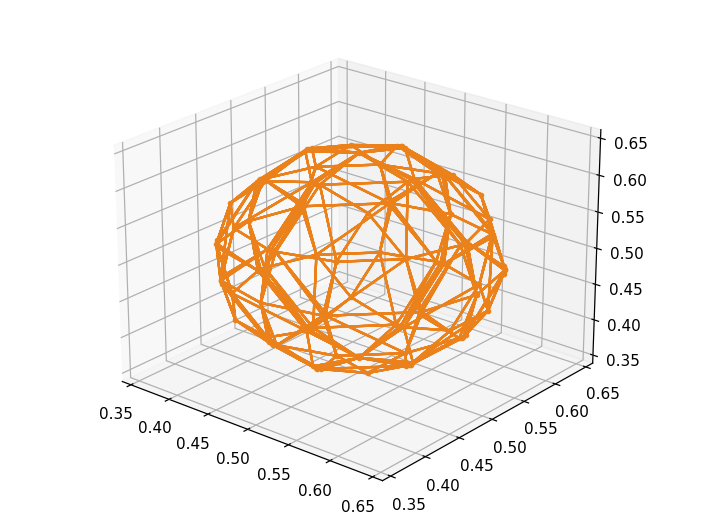

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [61]:
HC.plot_complex()

<IPython.core.display.Javascript object>


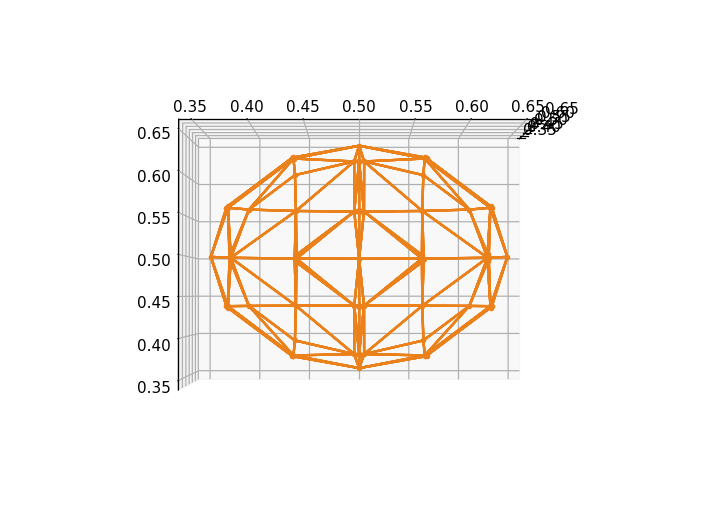

(0.35, 0.65)

In [92]:
%matplotlib notebook
X = np.array(X)
hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)

fig, axes, _, _ = HC.plot_complex()
axes.axes.set_xlim3d(left=0.35, right=0.65)

In [66]:
HC.V.size()

126

In [67]:
HC.V.merge_all(1e-12)
HC.V.size()

126

# Attempt 2:


In [78]:
r = 1 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.05017655,  0.14169731],
        [-0.00519868,  0.00799815,  0.        ],
        [ 0.07182466, -0.07182466,  0.        ],
        [-0.01614459, -0.0015655 ,  0.05688137],
        [-0.01614459, -0.0015655 , -0.05688137],
        [ 0.        ,  0.05017655, -0.14169731]], dtype=float128),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.05017655,  0.14169731],
        [ 0.0565895 ,  0.        , -0.18388269],
        [ 0.        ,  0.0646812 , -0.0646812 ],
        [-0.02662078,  0.        ,  0.11565865]], dtype=float128),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.02662078,  0.        ,  0.11565865],
        [-0.0262075 ,  0.11057697,  0.        ],
        [ 0.00519868, -0.00799815,  0.        ],
        [ 0.02662078,  0.        , -0.11565865],
        [-0.0009167 , -0.0472613 , -0.05124409],
        [-0.0009167 , -0.0472613 ,  0.05124409]], dtype=float128),
 array([[ 0.   

In [79]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

#(HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
# K_H_2, HNdA_i_Cij) = int_curvatures(HC, bV, r, theta_p, printout=0)

In [80]:
HNda_v_cache

{(0.375,
  0.43577986660211937,
  0.5): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.05017655,  0.14169731],
        [-0.00519868,  0.00799815,  0.        ],
        [ 0.07182466, -0.07182466,  0.        ],
        [-0.01614459, -0.0015655 ,  0.05688137],
        [-0.01614459, -0.0015655 , -0.05688137],
        [ 0.        ,  0.05017655, -0.14169731]], dtype=float128),
 (0.375,
  0.4375,
  0.49514238659853893): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.05017655,  0.14169731],
        [ 0.0565895 ,  0.        , -0.18388269],
        [ 0.        ,  0.0646812 , -0.0646812 ],
        [-0.02662078,  0.        ,  0.11565865]], dtype=float128),
 (0.37388193871477254,
  0.4375,
  0.5): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.02662078,  0.        ,  0.11565865],
        [-0.0262075 ,  0.11057697,  0.        ],
        [ 0.00519868, -0.00799815,  0.        ],
        [ 0.02662078,  0.        , -0.11565865],
        [-

# Comparison with analytical solution

The sphere has a radius of $r = 0.15$ m and therefore a point-wise mean ("fluid mean") curvature of $H = \frac{2}{r}$  and an area of $A = 4\pi r^2$

$$ \int H N dA = \frac{2}{r} \cdot 4\pi r^2 = 8 \pi r  $$

In [81]:
2/r, np.abs(np.array(HN_i)), (np.abs(np.array(HN_i))- 2/r)

(13.333333333333333827,
 array([ 3.82060656,  5.65449353,  3.23559032,  3.36012523,  3.27759895,
        24.62244234, 45.56704252,  6.31988659,  0.95497192, 19.01588534,
         4.98102111,  1.96160407,  1.34719676,  1.73695897,  0.22172197,
         0.31548988,  0.75198543,  3.23559032,  5.65449353,  3.23355454,
         3.36012523,  7.78160683, 13.27145093,  7.29689792,  2.42321999,
         2.27227992,  0.98506834,  5.13666043, 45.56704252, 10.43866613,
         1.50865292,  2.13640261, 39.679372  ,  3.07422209,  2.26760377,
         4.12859359,  1.86381784,  3.19126036,  7.71214589,  0.57750206,
         1.72923717,  0.68078609,  3.60118074,  4.51974359,  2.81421736,
        45.56704252, 24.62244234,  3.27759895,  6.31988659,  0.95497192,
        19.01588534,  4.98102111, 10.43866613, 45.56704252,  5.13666043,
         1.50865292,  2.13640261, 39.679372  ,  6.12481175,  9.08484886,
         1.49743321, 19.01588534,  4.11948606, 56.16243279,  2.1117002 ,
         0.96209863,  5.039

<IPython.core.display.Javascript object>


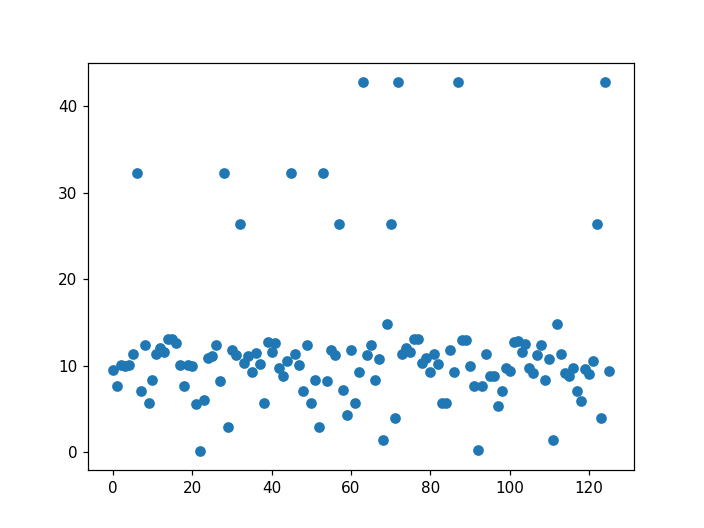

In [87]:
%matplotlib notebook
plt.scatter(list(range(len((np.abs(np.array(HN_i)))))), abs((np.abs(np.array(HN_i))- 2/r)))
plt.show()

In [82]:
np.sum(np.linalg.norm(HNdA_i, axis=1)), 8*np.pi*r

(3.3753158770259047172, 3.7699111843077515998)

In [90]:
abs((np.sum(np.linalg.norm(HNdA_i, axis=1)) - 8*np.pi*r)/8*np.pi*r)*100  # Error percentage

2.3243582221831070938

In [72]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([ 7.53859323e-20,  2.87991202e-20, -6.77626358e-21], dtype=float128),
 3.7699111843077515998)

In [73]:
np.sum(HNdA_ij), 8*np.pi*r 

(0.0, 3.7699111843077515998)

# Check comparison with Qhull


In [ ]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)

In [ ]:
import scipy.spatial 
tri = scipy.spatial.Delaunay(X)

In [ ]:
HC.vf_to_vv(tri.points, tri.simplices)


In [ ]:
HC.plot_complex()

In [ ]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)
dV = HC.boundary_d(HC.V)
HC.vf_to_vv(tri.points, tri.simplices)
HC.plot_complex()

In [ ]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

In [ ]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

In [ ]:
np.sum(HNdA_ij), 4*np.pi*r

# QHull without centroids

In [ ]:
import scipy.spatial 
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)

HC.vf_to_vv(tri.points, tri.simplices)
dV = HC.boundary_d(HC.V)
#HC.plot_complex()

r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
np.sum(HNdA_ij, axis=0), 8*np.pi*r

In [ ]:
np.sum(HNdA_ij), 4*np.pi*r

In [ ]:
np.linalg.norm(HNdA_ij), 4*np.pi*r 

# Comparison with analytical solution

The sphere has a radius of $r = 0.15$ m and therefore a point-wise mean ("fluid mean") curvature of $H = \frac{2}{r}$  and an area of $A = 4\pi r^2$

$$ \int H N dA = \frac{2}{r} \cdot 4\pi r^2 = 8 \pi r  $$

In [ ]:
R = r / np.cos(theta_p)
H_f = 2 / R  # 2 / R
h = np.abs(R * np.sin(theta_p) - R)  # Height of the spherical cap
# Area of spherical cap:
dA = 2 * np.pi * R * h
dC = 2 * np.pi * r
a = R * np.cos(theta_p)
# a = R * np.sin(theta_p)
k_g_f = np.sqrt(R ** 2 - a ** 2) / (R * a)
int_H_f = H_f * dA
int_H_f_full = 2* H_f * dA

In [ ]:
def analytical_cap(r, theta_p):
    R = r / np.cos(theta_p)
    K_f = (1 / R) ** 2
    H_f = 2 / R  # 2 / R
    h = np.abs(R * np.sin(theta_p) - R)  # Height of the spherical cap
    # Area of spherical cap:
    dA = 2 * np.pi * R * h
    dC = 2 * np.pi * r
    a = R * np.cos(theta_p)
    # a = R * np.sin(theta_p)
    k_g_f = np.sqrt(R ** 2 - a ** 2) / (R * a)
    int_H_f = H_f * dA
    int_H_f_full = 2* H_f * dA
    return int_H_f, int_H_f_full, H_f, K_f, dA, k_g_f, dC


In [ ]:
import numpy as np
theta_p = 0 * np.pi/180.0  # Three phase contact angle
r = 0.15 # Radius of the tube (20 mm)
int_H_f, int_H_f_full, H_f, K_f, dA, k_g_f, dC = analytical_cap(r, theta_p)
int_H_f, int_H_f_full, H_f, K_f, dA, k_g_f, dC

In [ ]:
8*np.pi*r, int_H_f_full